In [1]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
from matplotlib import pyplot
import os
from collections import Counter
import seaborn as sns

train = pd.read_csv('./input/dddd.csv')
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,F,43,0,6,6,15,15,2.20,0,0,0,0,0
1,F,47,0,14,7,33,17,1.26,0,0,0,0,0
2,F,29,0,7,7,18,18,1.67,0,0,0,0,0
3,F,60,0,7,7,18,18,3.00,0,0,0,0,0
4,F,55,0,7,0,18,0,0.00,0,0,0,0,0


In [2]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1242 non-null   object 
 1   B       1242 non-null   int64  
 2   C       1242 non-null   int64  
 3   D       1242 non-null   int64  
 4   E       1242 non-null   int64  
 5   F       1242 non-null   int64  
 6   G       1242 non-null   int64  
 7   H       1242 non-null   float64
 8   I       1242 non-null   int64  
 9   J       1242 non-null   int64  
 10  K       1242 non-null   int64  
 11  L       1242 non-null   int64  
 12  M       1242 non-null   int64  
dtypes: float64(1), int64(11), object(1)
memory usage: 126.3+ KB


In [3]:
train.describe()

,B,C,D,E,F,G,H,I,J,K,L,M
count,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000,1242.000000
mean,43.557971,3.556361,18.523349,18.066023,50.523349,50.312399,2.951103,1.998390,2.099034,1.165862,25.082931,1.048309
std,10.343898,2.237429,11.801672,11.700485,33.623931,33.543564,1.110437,1.068936,2.022201,1.591636,50.122272,0.588023
min,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,37.000000,1.000000,9.000000,9.000000,23.250000,24.000000,2.500000,1.000000,0.000000,0.000000,0.000000,1.000000
50%,45.000000,4.000000,14.000000,14.000000,39.000000,39.000000,3.210000,2.000000,2.000000,0.000000,3.000000,1.000000
75%,51.000000,5.000000,25.000000,25.000000,72.000000,72.000000,3.690000,3.000000,4.000000,2.000000,30.750000,1.000000
max,73.000000,7.000000,64.000000,63.000000,165.000000,228.000000,4.500000,4.000000,9.000000,8.000000,440.000000,3.000000


In [4]:
for label, content in train.items():
    print("%s:" % label, train[label].unique())

A: ['F' 'M']
B: [43 47 29 60 55 24 49 30 26 40 45 33 50 44 25 62 58 39 38 56 51 54 42 32
 36 52 63 66 68 59 64 73 70 67 41 53 48 46 57 21 35 31 27 28 61 37 18 20
 22 34 23 69 65 71]
C: [0 5 3 4 7 6 2 1]
D: [ 6 14  7 13 12 28  4 32 16 17 23  0 27 15  9 21 64  5 11 26 38 52  3 25
 10 19 18 20 44 22 24 31  8 29 30 34 33 39 49 46 42 45 47 37 40 41 48 51
 53 50 36 55 35 43 58 59 57 56]
E: [ 6  7  0 13 27  4 32 16 17 19 12 14 10 20  5 63 15 22 11  8  9 18 38 52
 43 26 24 25 23 28 21 29 31 30 34 33 39 49 46 42 47 37 40 45 44 41 51 53
 50 48 55 35 56 57  3]
F: [ 15  33  18  36  27  71   9  88  45  48  66   0  39  31  16  30  17  67
 107 141  72  54  51  57  50 123  63  52  81  53  55  69  90  70  21  78
  34  41  35  37  68  75  80  76  12  94  92 138 129 115 130 108 105 122
 117 116 111 120 112  99 103 131 149 140 128  73  62  74  42  84  82 158
  60  98  87  97  24  59  10  23  32  28  43  86  77 118 126  64 160 144
 100  93 165  91 159  49  44  26  56  96  85 114  95 113 109 106 110 104
 12

In [5]:
gender_list = []
gender_labels = ['M', 'F']
for i in range(len(train)):
    gender_list.append(gender_labels.index(train['A'][i]))

train['A'] = gender_list
train.head()

,A,B,C,D,E,F,G,H,I,J,K,L,M
0,1,43,0,6,6,15,15,2.20,0,0,0,0,0
1,1,47,0,14,7,33,17,1.26,0,0,0,0,0
2,1,29,0,7,7,18,18,1.67,0,0,0,0,0
3,1,60,0,7,7,18,18,3.00,0,0,0,0,0
4,1,55,0,7,0,18,0,0.00,0,0,0,0,0


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1242 entries, 0 to 1241
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       1242 non-null   int64  
 1   B       1242 non-null   int64  
 2   C       1242 non-null   int64  
 3   D       1242 non-null   int64  
 4   E       1242 non-null   int64  
 5   F       1242 non-null   int64  
 6   G       1242 non-null   int64  
 7   H       1242 non-null   float64
 8   I       1242 non-null   int64  
 9   J       1242 non-null   int64  
 10  K       1242 non-null   int64  
 11  L       1242 non-null   int64  
 12  M       1242 non-null   int64  
dtypes: float64(1), int64(12)
memory usage: 126.3 KB


In [7]:
for label, content in train.items():
    print("%s:" % label, train[label].unique())

A: [1 0]
B: [43 47 29 60 55 24 49 30 26 40 45 33 50 44 25 62 58 39 38 56 51 54 42 32
 36 52 63 66 68 59 64 73 70 67 41 53 48 46 57 21 35 31 27 28 61 37 18 20
 22 34 23 69 65 71]
C: [0 5 3 4 7 6 2 1]
D: [ 6 14  7 13 12 28  4 32 16 17 23  0 27 15  9 21 64  5 11 26 38 52  3 25
 10 19 18 20 44 22 24 31  8 29 30 34 33 39 49 46 42 45 47 37 40 41 48 51
 53 50 36 55 35 43 58 59 57 56]
E: [ 6  7  0 13 27  4 32 16 17 19 12 14 10 20  5 63 15 22 11  8  9 18 38 52
 43 26 24 25 23 28 21 29 31 30 34 33 39 49 46 42 47 37 40 45 44 41 51 53
 50 48 55 35 56 57  3]
F: [ 15  33  18  36  27  71   9  88  45  48  66   0  39  31  16  30  17  67
 107 141  72  54  51  57  50 123  63  52  81  53  55  69  90  70  21  78
  34  41  35  37  68  75  80  76  12  94  92 138 129 115 130 108 105 122
 117 116 111 120 112  99 103 131 149 140 128  73  62  74  42  84  82 158
  60  98  87  97  24  59  10  23  32  28  43  86  77 118 126  64 160 144
 100  93 165  91 159  49  44  26  56  96  85 114  95 113 109 106 110 104
 125 12

In [8]:
len(train)

1242

In [9]:
train.groupby(['M']).size()

M
0    146
1    930
2    126
3     40
dtype: int64

In [10]:
y = train['M'].values
x = train.drop(['M'], axis=1)
x = x.values

x = (x - x.min()) / (x.max() - x.min())

Class=0, n=146 (11.755%)
Class=1, n=930 (74.879%)
Class=2, n=126 (10.145%)
Class=3, n=40 (3.221%)


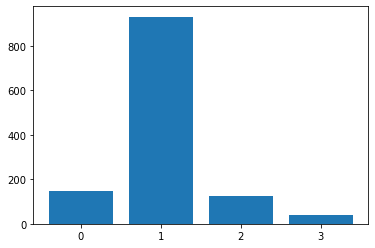

In [11]:
def count_and_plot(y): 
    counter = Counter(y)
    for k,v in counter.items():
        print('Class=%d, n=%d (%.3f%%)' % (k, v, v / len(y) * 100))
    pyplot.bar(counter.keys(), counter.values())
    plt.xticks([0,1,2,3])
    pyplot.show()
    

count_and_plot(y)

Class=0, n=40 (25.000%)
Class=1, n=40 (25.000%)
Class=2, n=40 (25.000%)
Class=3, n=40 (25.000%)


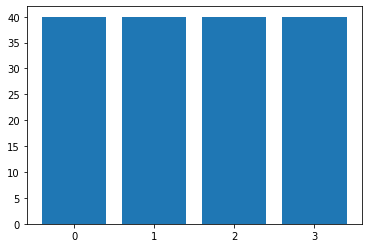

In [12]:
from imblearn.under_sampling import RandomUnderSampler
re_x, re_y = RandomUnderSampler(random_state=0).fit_resample(x, y)
count_and_plot(re_y)

In [13]:
from sklearn.model_selection import train_test_split
import tensorflow as tf

x_train , x_test , y_train , y_test = train_test_split(x, y,test_size=0.2,shuffle = True, random_state=42)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=4)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=4)

In [14]:
model = tf.keras.Sequential(
    [tf.keras.layers.Dense(units=32, activation='relu', input_shape=x_train[0].shape),
     tf.keras.layers.Dense(units=16, activation='relu'),
     tf.keras.layers.Dense(units=8, activation='relu'),
     tf.keras.layers.Dense(units=4, activation='softmax') ])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [15]:
model.compile(optimizer=tf.keras.optimizers.Adam(lr=0.005),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
model.summary()


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 8)                 136       
_________________________________________________________________
dense_3 (Dense)              (None, 4)                 36        
Total params: 1,116
Trainable params: 1,116
Non-trainable params: 0
_________________________________________________________________


In [16]:
history = model.fit(x_train,
                    y_train,
                    epochs=1000,
                    batch_size=10,
                    validation_split=0.2,
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=10, monitor='val_loss')])

Train on 794 samples, validate on 199 samples
Epoch 1/1000
794/794 [==============================] - 0s 487us/sample - loss: 0.9032 - acc: 0.7418 - val_loss: 0.6722 - val_acc: 0.7789
Epoch 2/1000
794/794 [==============================] - 0s 206us/sample - loss: 0.7113 - acc: 0.7506 - val_loss: 0.5667 - val_acc: 0.7789
Epoch 3/1000
794/794 [==============================] - 0s 178us/sample - loss: 0.5662 - acc: 0.7632 - val_loss: 0.4333 - val_acc: 0.7839
Epoch 4/1000
794/794 [==============================] - 0s 192us/sample - loss: 0.4326 - acc: 0.8262 - val_loss: 0.3274 - val_acc: 0.8392
Epoch 5/1000
794/794 [==============================] - 0s 196us/sample - loss: 0.3935 - acc: 0.8338 - val_loss: 0.3137 - val_acc: 0.8543
Epoch 6/1000
794/794 [==============================] - 0s 201us/sample - loss: 0.3651 - acc: 0.8564 - val_loss: 0.3013 - val_acc: 0.8442
Epoch 7/1000
794/794 [==============================] - 0s 205us/sample - loss: 0.3726 - acc: 0.8388 - val_loss: 0.2947 - val_

In [17]:
#Save Model
model.save('D:/deep-learning/model/noh2.h5')
model.save_weights('D:/deep-learning/model/noh2.h5')


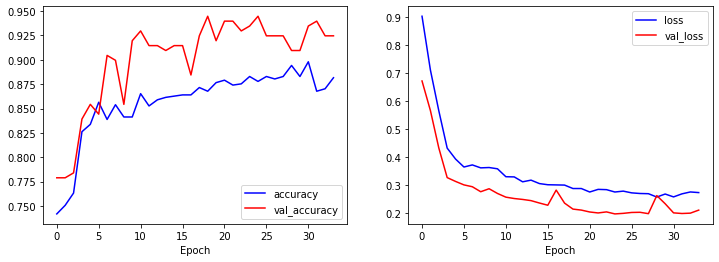

In [18]:
plt.figure(figsize=(12,4))

plt.subplot(1, 2, 1)
plt.plot(history.history['acc'], 'b-', label='accuracy')
plt.plot(history.history['val_acc'], 'r-', label='val_accuracy')
plt.xlabel('Epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], 'b-', label='loss')
plt.plot(history.history['val_loss'], 'r-', label='val_loss')
plt.xlabel('Epoch')
plt.legend()


plt.show()

In [19]:
model.evaluate(x_test, y_test)

249/249 [==============================] - 0s 44us/sample - loss: 0.3058 - acc: 0.8635


[0.30583423777038315, 0.8634538]

In [20]:
print(x_test[0:3])

[[0.00227273 0.06363636 0.01136364 0.01363636 0.01363636 0.03636364
  0.03636364 0.00915909 0.00681818 0.00681818 0.00681818 0.14545455]
 [0.         0.14545455 0.01136364 0.02954545 0.02954545 0.08181818
  0.08181818 0.00768182 0.00681818 0.00681818 0.00227273 0.        ]
 [0.00227273 0.11818182 0.01136364 0.04090909 0.04090909 0.11590909
  0.11590909 0.00929545 0.00454545 0.         0.         0.10681818]]


In [21]:
print(y_test[0:3])

[[0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]]


In [22]:
print(model.predict(x_test[0:3]))

[[5.7521782e-11 1.0000000e+00 1.1741798e-08 1.1355066e-15]
 [3.1199926e-03 9.8835617e-01 8.4931804e-03 3.0587282e-05]
 [2.0692042e-08 9.9999917e-01 7.8382948e-07 1.0206117e-11]]


In [23]:
test_x = [[0,40,0,0,0,0,0,0,0,0,0,0]]

In [24]:
print(model.predict([test_x]))

[[4.0997752e-27 1.0000000e+00 2.7195618e-12 0.0000000e+00]]
